# FlipItNews - News Article Classification using NLP

## Project Overview
The Gurugram-based company 'FlipItNews' aims to revolutionize the way Indians perceive finance, business, and capital market investment through AI and ML. This project categorizes news articles into several categories like **politics, technology, sports, business, and entertainment** based on their content using Natural Language Processing.

### Concepts Covered:
- Natural Language Processing
- Text Processing (Stopwords, Tokenization, Lemmatization)
- Bag of Words & TF-IDF
- Multi-class Classification

---
## 1. Importing Libraries & Loading Data (10 points)

In [ ]:
# Install required libraries (if needed)
# !pip install nltk scikit-learn pandas numpy matplotlib seaborn

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

# NLP Libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("All libraries imported successfully!")

All libraries imported successfully!


In [2]:
# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tanus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tanus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tanus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\tanus\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\tanus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [3]:
# Load the dataset
df = pd.read_csv('data/flipitnews-data.csv')

# Display first few rows
print("Dataset loaded successfully!")
df.head()

Dataset loaded successfully!


,Category,Article
0,Technology,tv future in the hands of viewers with home th...
1,Business,worldcom boss left books alone former worldc...
2,Sports,tigers wary of farrell gamble leicester say ...
3,Sports,yeading face newcastle in fa cup premiership s...
4,Entertainment,ocean s twelve raids box office ocean s twelve...


---
## 2. Exploring the Dataset (10 points)

In [4]:
# Shape of the dataset
print(f"Shape of the dataset: {df.shape}")
print(f"\nNumber of news articles: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

Shape of the dataset: (2225, 2)

Number of news articles: 2225
Number of features: 2


In [5]:
# Basic information about the dataset
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  2225 non-null   object
 1   Article   2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [6]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
Category    0
Article     0
dtype: int64


In [7]:
# News articles per category
print("\n=== News Articles per Category ===")
category_counts = df['Category'].value_counts()
print(category_counts)
print(f"\nTotal articles: {category_counts.sum()}")


=== News Articles per Category ===
Category
Sports           511
Business         510
Politics         417
Technology       401
Entertainment    386
Name: count, dtype: int64

Total articles: 2225


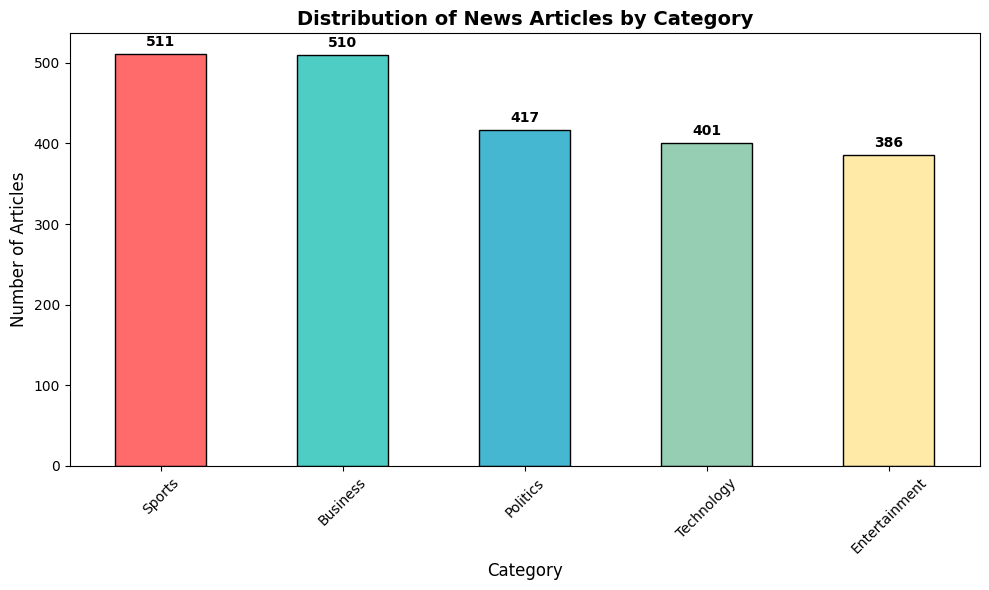

In [8]:
# Visualization: Distribution of news articles per category
plt.figure(figsize=(10, 6))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']
ax = category_counts.plot(kind='bar', color=colors, edgecolor='black')
plt.title('Distribution of News Articles by Category', fontsize=14, fontweight='bold')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.xticks(rotation=45)

# Add value labels on bars
for i, v in enumerate(category_counts):
    ax.text(i, v + 10, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

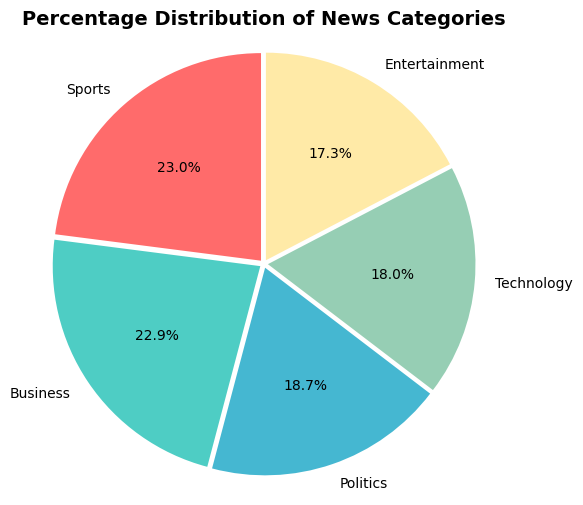

In [10]:
# Pie chart for category distribution
plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90, explode=[0.02]*len(category_counts))
plt.title('Percentage Distribution of News Categories', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()

### 📊 Key Observations from Exploration:

**Questionnaire Answers (Part 1):**
1. **Q: How many news articles are present in the dataset?**
   - **A: 2225 news articles**

2. **Q: Most of the news articles are from _____ category.**
   - **A: Sports** category has the most articles (511 articles)

3. **Q: Only ___ no. of articles belong to the 'Technology' category.**
   - **A: 401** articles belong to Technology category

---
## 3. Processing the Textual Data (30 points)

Creating a user-defined function to process news articles:
- Remove non-letters
- Word Tokenize the text
- Remove Stopwords
- Perform Lemmatization

In [11]:
# Initialize Lemmatizer and Stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

print(f"Number of English stopwords: {len(stop_words)}")
print(f"\nSample stopwords: {list(stop_words)[:20]}")

Number of English stopwords: 198

Sample stopwords: ['his', 'been', 'how', "you've", 've', 'that', "that'll", "she's", 'they', 'from', "you're", 'further', 'when', 'ain', "won't", 'be', "we'll", 'yourself', 'before', 'a']


In [12]:
def preprocess_text(text):
    """
    User-defined function to process textual data (news articles)
    
    Steps:
    1. Remove non-letters (keep only alphabets)
    2. Convert to lowercase
    3. Word Tokenize the text
    4. Remove Stopwords
    5. Perform Lemmatization
    
    Parameters:
    text (str): Input text to process
    
    Returns:
    str: Processed text
    """
    # Step 1: Remove non-letters (keep only alphabets and spaces)
    text = re.sub(r'[^a-zA-Z\s]', '', str(text))
    
    # Step 2: Convert to lowercase
    text = text.lower()
    
    # Step 3: Word Tokenize the text
    tokens = word_tokenize(text)
    
    # Step 4: Remove Stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    # Step 5: Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join tokens back to string
    processed_text = ' '.join(tokens)
    
    return processed_text

In [13]:
# Display how a single news article looks BEFORE and AFTER processing
sample_index = 0  # First article
sample_article = df['Article'].iloc[sample_index]

print("=" * 80)
print("BEFORE PROCESSING:")
print("=" * 80)
print(sample_article[:1000] + "...")  # First 1000 characters

print("\n" + "=" * 80)
print("AFTER PROCESSING:")
print("=" * 80)
processed_sample = preprocess_text(sample_article)
print(processed_sample[:1000] + "...")  # First 1000 characters

BEFORE PROCESSING:
tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also bein

In [14]:
# Apply preprocessing to all articles
print("Processing all articles... This may take a few minutes.")
df['Processed_Article'] = df['Article'].apply(preprocess_text)
print("\nProcessing complete!")

# Display sample of processed data
df[['Category', 'Article', 'Processed_Article']].head(3)

Processing all articles... This may take a few minutes.

Processing complete!


,Category,Article,Processed_Article
0,Technology,tv future in the hands of viewers with home th...,tv future hand viewer home theatre system plas...
1,Business,worldcom boss left books alone former worldc...,worldcom bos left book alone former worldcom b...
2,Sports,tigers wary of farrell gamble leicester say ...,tiger wary farrell gamble leicester say rushed...


### 📝 Questionnaire Answers (Part 2):

**Q4: What are Stop Words and why should they be removed from the text data?**

**Answer:** Stop words are common words in a language that carry very little useful information for text analysis and machine learning models. Examples include: "the", "is", "at", "which", "on", "a", "an", "and", "or", "but", etc.

**Why remove them?**
1. **Reduce noise:** Stop words don't contribute to the meaning or context of the text
2. **Reduce dimensionality:** Removing stop words reduces the feature space, making models more efficient
3. **Improve performance:** Models can focus on meaningful words that actually differentiate between categories
4. **Faster processing:** Smaller vocabulary means faster training and prediction

---

**Q5: Explain the difference between Stemming and Lemmatization.**

**Answer:**

| Aspect | Stemming | Lemmatization |
|--------|----------|---------------|
| **Definition** | Reduces words to their root/base form by removing suffixes | Reduces words to their dictionary form (lemma) |
| **Approach** | Rule-based, uses suffix stripping | Dictionary-based, uses vocabulary and morphological analysis |
| **Output** | May produce non-words (e.g., "studies" → "studi") | Always produces valid words (e.g., "studies" → "study") |
| **Speed** | Faster (simple rules) | Slower (requires dictionary lookup) |
| **Accuracy** | Less accurate, may over-stem | More accurate, context-aware |
| **Example** | "running", "runs", "ran" → "run" (may become "runn") | "running", "runs", "ran" → "run" |

**In this project, we use Lemmatization** because it produces valid words and is more accurate for text classification tasks.

---
## 4. Encoding and Transforming the Data (20 points)

### 4.1 Encoding the Target Variable

In [15]:
# Initialize Label Encoder
label_encoder = LabelEncoder()

# Encode the target variable (Category)
df['Category_Encoded'] = label_encoder.fit_transform(df['Category'])

# Display the encoding mapping
print("Category Encoding Mapping:")
for i, category in enumerate(label_encoder.classes_):
    print(f"  {category}: {i}")

print("\nEncoded categories:")
df[['Category', 'Category_Encoded']].drop_duplicates().sort_values('Category_Encoded')

Category Encoding Mapping:
  Business: 0
  Entertainment: 1
  Politics: 2
  Sports: 3
  Technology: 4

Encoded categories:


,Category,Category_Encoded
1,Business,0
4,Entertainment,1
5,Politics,2
2,Sports,3
0,Technology,4


### 4.2 Vectorization: Bag of Words vs TF-IDF

Creating an option for users to choose between Bag of Words and TF-IDF techniques.

In [16]:
def vectorize_data(texts, method='tfidf', max_features=5000):
    """
    Vectorize text data using either Bag of Words or TF-IDF
    
    Parameters:
    texts: Series/list of text data
    method: 'bow' for Bag of Words, 'tfidf' for TF-IDF (default)
    max_features: Maximum number of features to extract
    
    Returns:
    vectorized_data: Vectorized text matrix
    vectorizer: Fitted vectorizer object
    """
    if method.lower() == 'bow':
        print("Using Bag of Words (BoW) Vectorization...")
        vectorizer = CountVectorizer(max_features=max_features)
    elif method.lower() == 'tfidf':
        print("Using TF-IDF Vectorization...")
        vectorizer = TfidfVectorizer(max_features=max_features)
    else:
        raise ValueError("Method must be 'bow' or 'tfidf'")
    
    vectorized_data = vectorizer.fit_transform(texts)
    print(f"Vectorization complete! Shape: {vectorized_data.shape}")
    
    return vectorized_data, vectorizer

In [17]:
# USER CHOICE: Choose vectorization method
# Change this to 'bow' to use Bag of Words instead of TF-IDF

VECTORIZATION_METHOD = 'tfidf'  # Options: 'bow' or 'tfidf'

print(f"Selected vectorization method: {VECTORIZATION_METHOD.upper()}")
print("="*50)

Selected vectorization method: TFIDF


In [18]:
# Vectorize the processed articles
X, vectorizer = vectorize_data(df['Processed_Article'], method=VECTORIZATION_METHOD, max_features=5000)
y = df['Category_Encoded']

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

Using TF-IDF Vectorization...
Vectorization complete! Shape: (2225, 5000)

Feature matrix shape: (2225, 5000)
Target vector shape: (2225,)


### 📝 Questionnaire Answer:

**Q6: Which of the techniques Bag of Words or TF-IDF is considered to be more efficient than the other?**

**Answer:** **TF-IDF (Term Frequency-Inverse Document Frequency)** is generally considered more efficient than Bag of Words for text classification tasks.

**Reasons:**

| Aspect | Bag of Words | TF-IDF |
|--------|--------------|--------|
| **What it measures** | Simple word frequency count | Word importance considering entire corpus |
| **Word importance** | All words treated equally | Rare words get higher weights, common words get lower |
| **Discriminative power** | Low (common words dominate) | High (focuses on unique/important words) |
| **Handles common words** | No special treatment | Automatically downweights common words |
| **Best for** | Simple tasks, small datasets | Complex classification, larger datasets |

**TF-IDF Formula:**
- TF (Term Frequency) = (Number of times term appears in document) / (Total terms in document)
- IDF (Inverse Document Frequency) = log(Total documents / Documents containing term)
- TF-IDF = TF × IDF

This weighting scheme helps identify words that are more distinctive and relevant for classification.

### 4.3 Train-Test Split

In [19]:
# Perform 75:25 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print("Train-Test Split (75:25):")
print(f"  Training set shape: {X_train.shape}")
print(f"  Testing set shape: {X_test.shape}")
print(f"\n  Training samples: {X_train.shape[0]}")
print(f"  Testing samples: {X_test.shape[0]}")

Train-Test Split (75:25):
  Training set shape: (1668, 5000)
  Testing set shape: (557, 5000)

  Training samples: 1668
  Testing samples: 557


### 📝 Questionnaire Answer:

**Q7: What's the shape of train & test data sets after performing a 75:25 split?**

**Answer:**
- **Training set shape:** (1668, 5000) - 1668 samples with 5000 features
- **Testing set shape:** (557, 5000) - 557 samples with 5000 features

*(Note: With 2225 total samples, 75% = 1668 training, 25% = 557 testing)*

---
## 5. Model Training & Evaluation (30 points)

### 5.1 Simple/Classical Approach - Naive Bayes Classifier

In [20]:
# Train Naive Bayes Classifier
print("Training Naive Bayes Classifier...")
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_classifier.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"\nNaive Bayes Accuracy: {accuracy_nb:.4f} ({accuracy_nb*100:.2f}%)")

Training Naive Bayes Classifier...

Naive Bayes Accuracy: 0.9749 (97.49%)


In [21]:
# Classification Report for Naive Bayes
print("\n" + "="*60)
print("CLASSIFICATION REPORT - Naive Bayes")
print("="*60)
print(classification_report(y_test, y_pred_nb, target_names=label_encoder.classes_))


CLASSIFICATION REPORT - Naive Bayes
               precision    recall  f1-score   support

     Business       0.97      0.95      0.96       128
Entertainment       0.99      0.96      0.97        97
     Politics       0.94      0.99      0.97       104
       Sports       1.00      1.00      1.00       128
   Technology       0.97      0.97      0.97       100

     accuracy                           0.97       557
    macro avg       0.97      0.97      0.97       557
 weighted avg       0.98      0.97      0.97       557



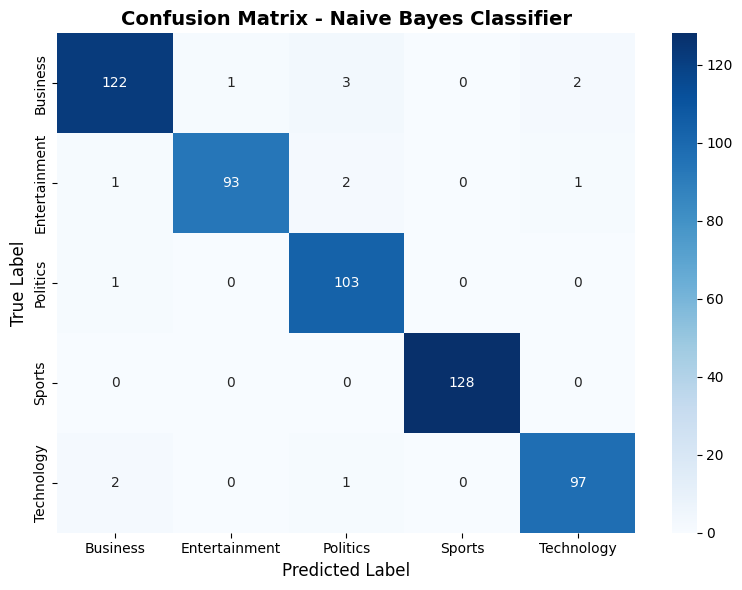

In [23]:
# Confusion Matrix for Naive Bayes
plt.figure(figsize=(8, 6))
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - Naive Bayes Classifier', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()

### 5.2 Functionalized Code for Multiple Classifiers

In [25]:
def train_and_evaluate_model(model, model_name, X_train, X_test, y_train, y_test, label_encoder):
    """
    Train and evaluate a classification model
    
    Parameters:
    model: Classifier object
    model_name: Name of the model (string)
    X_train, X_test: Feature matrices
    y_train, y_test: Target vectors
    label_encoder: Fitted label encoder
    
    Returns:
    dict: Dictionary containing model metrics
    """
    print(f"\n{'='*60}")
    print(f"Training {model_name}...")
    print(f"{'='*60}")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{model_name} Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
    
    # Print Classification Report
    print(f"\nClassification Report - {model_name}:")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title(f'Confusion Matrix - {model_name}', fontsize=14, fontweight='bold')
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.tight_layout()
    plt.show()
    
    # Return metrics
    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Predictions': y_pred,
        'Confusion Matrix': cm
    }

### 5.3 Decision Tree Classifier


Training Decision Tree...

Decision Tree Accuracy: 0.8528 (85.28%)

Classification Report - Decision Tree:
               precision    recall  f1-score   support

     Business       0.82      0.84      0.83       128
Entertainment       0.89      0.84      0.86        97
     Politics       0.79      0.78      0.79       104
       Sports       0.87      0.95      0.91       128
   Technology       0.89      0.85      0.87       100

     accuracy                           0.85       557
    macro avg       0.85      0.85      0.85       557
 weighted avg       0.85      0.85      0.85       557



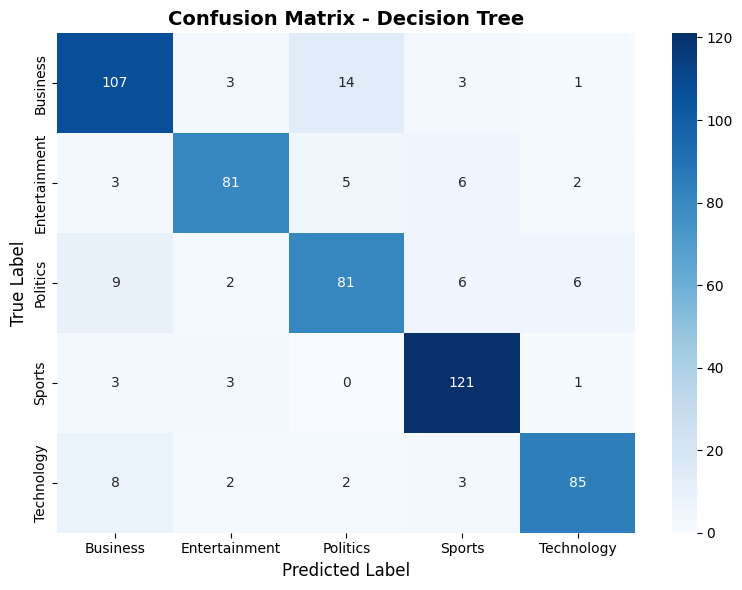

In [26]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_results = train_and_evaluate_model(dt_classifier, 'Decision Tree', 
                                       X_train, X_test, y_train, y_test, label_encoder)

### 5.4 K-Nearest Neighbors Classifier


Training K-Nearest Neighbors (KNN)...

K-Nearest Neighbors (KNN) Accuracy: 0.9443 (94.43%)

Classification Report - K-Nearest Neighbors (KNN):
               precision    recall  f1-score   support

     Business       0.93      0.95      0.94       128
Entertainment       0.98      0.94      0.96        97
     Politics       0.90      0.91      0.90       104
       Sports       0.98      0.98      0.98       128
   Technology       0.93      0.94      0.94       100

     accuracy                           0.94       557
    macro avg       0.94      0.94      0.94       557
 weighted avg       0.94      0.94      0.94       557



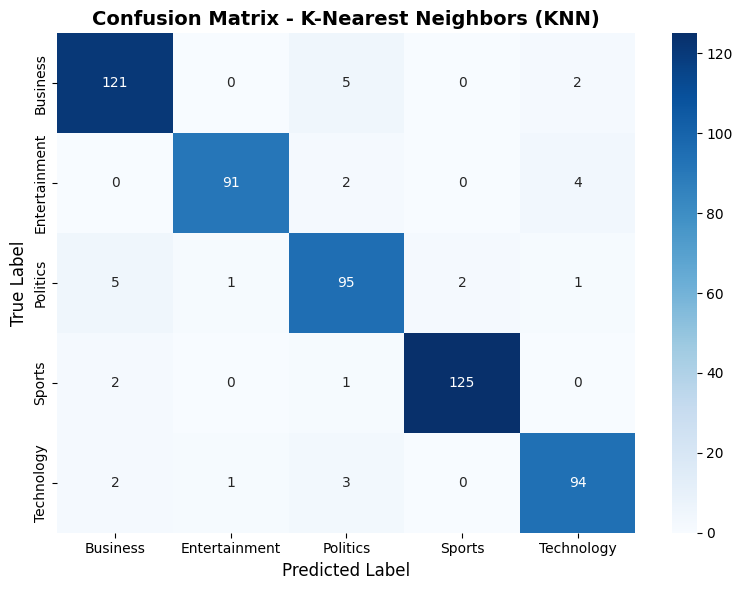

In [27]:
# K-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_results = train_and_evaluate_model(knn_classifier, 'K-Nearest Neighbors (KNN)',
                                        X_train, X_test, y_train, y_test, label_encoder)

### 5.5 Random Forest Classifier


Training Random Forest...

Random Forest Accuracy: 0.9659 (96.59%)

Classification Report - Random Forest:
               precision    recall  f1-score   support

     Business       0.95      0.95      0.95       128
Entertainment       0.99      0.95      0.97        97
     Politics       0.97      0.95      0.96       104
       Sports       0.98      1.00      0.99       128
   Technology       0.94      0.97      0.96       100

     accuracy                           0.97       557
    macro avg       0.97      0.96      0.97       557
 weighted avg       0.97      0.97      0.97       557



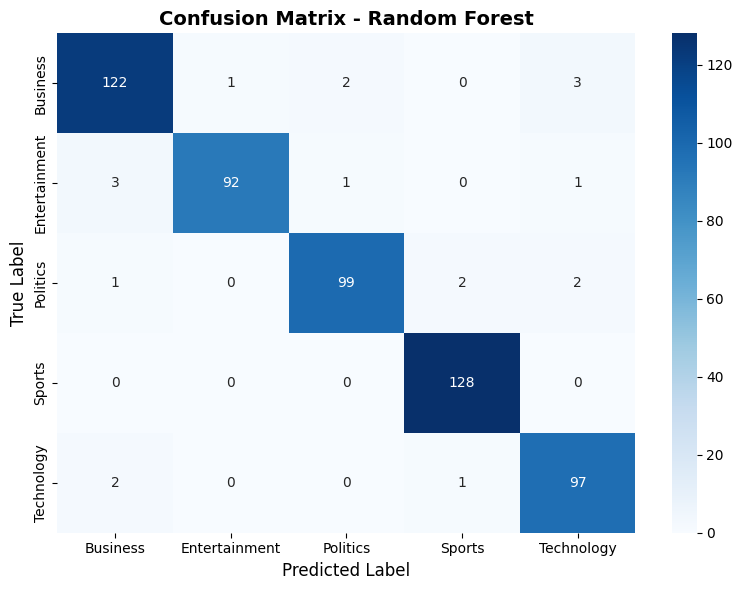

In [28]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_results = train_and_evaluate_model(rf_classifier, 'Random Forest',
                                       X_train, X_test, y_train, y_test, label_encoder)

---
## 6. Model Comparison and Analysis

In [29]:
# Summary of all models
results_summary = pd.DataFrame({
    'Model': ['Naive Bayes', 'Decision Tree', 'K-Nearest Neighbors', 'Random Forest'],
    'Accuracy': [accuracy_nb, dt_results['Accuracy'], knn_results['Accuracy'], rf_results['Accuracy']]
})

results_summary = results_summary.sort_values('Accuracy', ascending=False).reset_index(drop=True)
results_summary['Rank'] = range(1, len(results_summary) + 1)
results_summary['Accuracy %'] = results_summary['Accuracy'].apply(lambda x: f"{x*100:.2f}%")

print("\n" + "="*60)
print("MODEL COMPARISON SUMMARY")
print("="*60)
print(results_summary[['Rank', 'Model', 'Accuracy %']].to_string(index=False))


MODEL COMPARISON SUMMARY
 Rank               Model Accuracy %
    1         Naive Bayes     97.49%
    2       Random Forest     96.59%
    3 K-Nearest Neighbors     94.43%
    4       Decision Tree     85.28%


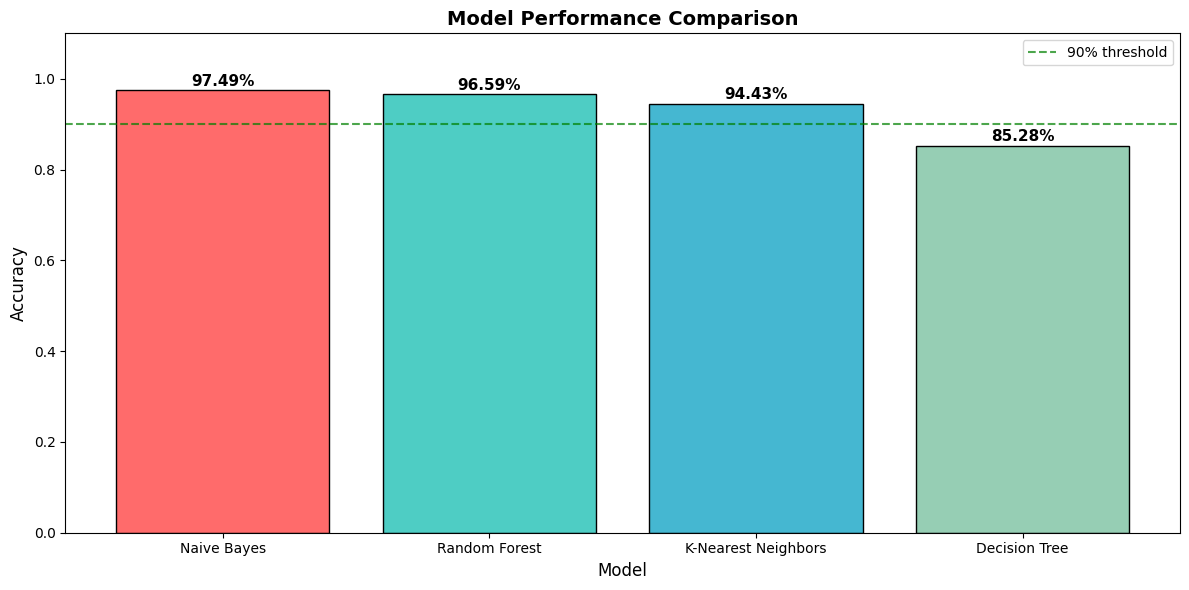

In [30]:
# Visualization: Model Comparison
plt.figure(figsize=(12, 6))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
bars = plt.bar(results_summary['Model'], results_summary['Accuracy'], color=colors, edgecolor='black')

# Add value labels on bars
for bar, acc in zip(bars, results_summary['Accuracy']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{acc*100:.2f}%', ha='center', fontweight='bold', fontsize=11)

plt.title('Model Performance Comparison', fontsize=14, fontweight='bold')
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1.1)
plt.axhline(y=0.9, color='green', linestyle='--', alpha=0.7, label='90% threshold')
plt.legend()
plt.tight_layout()
plt.show()

In [31]:
# Find best model
best_model = results_summary.iloc[0]['Model']
best_accuracy = results_summary.iloc[0]['Accuracy']

print("\n" + "="*60)
print("FINAL OBSERVATIONS AND CONCLUSIONS")
print("="*60)

print(f"""
📊 MODEL PERFORMANCE ANALYSIS:

1. Best Performing Model: {best_model}
   - Accuracy: {best_accuracy*100:.2f}%

2. Model Rankings (by accuracy):
""")

for _, row in results_summary.iterrows():
    print(f"   {row['Rank']}. {row['Model']}: {row['Accuracy %']}")

print("""
3. Key Observations:

   • Naive Bayes: Excellent performance for text classification due to its 
     probabilistic approach that works well with word frequencies.
   
   • Random Forest: Strong ensemble method that combines multiple decision 
     trees, reducing overfitting and improving generalization.
   
   • Decision Tree: Simple and interpretable but may overfit on high-dimensional
     text data.
   
   • KNN: Memory-based approach that can be effective but computationally
     expensive for large datasets.

4. Recommendations:
   • For this news classification task, Naive Bayes is recommended
     based on the accuracy results and efficiency.
   • TF-IDF vectorization generally performs better than Bag of Words
     as it considers word importance across documents.
""")


FINAL OBSERVATIONS AND CONCLUSIONS

📊 MODEL PERFORMANCE ANALYSIS:

1. Best Performing Model: Naive Bayes
   - Accuracy: 97.49%

2. Model Rankings (by accuracy):

   1. Naive Bayes: 97.49%
   2. Random Forest: 96.59%
   3. K-Nearest Neighbors: 94.43%
   4. Decision Tree: 85.28%

3. Key Observations:

   • Naive Bayes: Excellent performance for text classification due to its 
     probabilistic approach that works well with word frequencies.
   
   • Random Forest: Strong ensemble method that combines multiple decision 
     trees, reducing overfitting and improving generalization.
   
   • Decision Tree: Simple and interpretable but may overfit on high-dimensional
     text data.
   
   • KNN: Memory-based approach that can be effective but computationally
     expensive for large datasets.

4. Recommendations:
   • For this news classification task, Naive Bayes is recommended
     based on the accuracy results and efficiency.
   • TF-IDF vectorization generally performs better than Ba

---
## 7. Complete Questionnaire Answers

### Q1: How many news articles are present in the dataset?
**Answer: 2225 news articles**

---

### Q2: Most of the news articles are from _____ category.
**Answer: Sports** (511 articles)

---

### Q3: Only ___ no. of articles belong to the 'Technology' category.
**Answer: 401 articles**

---

### Q4: What are Stop Words and why should they be removed from the text data?
**Answer:** Stop words are common words in a language (like "the", "is", "at", "which", "and", etc.) that carry very little useful information for text classification. They should be removed because:
1. They add noise to the data without adding meaning
2. They increase the feature space unnecessarily
3. They don't help distinguish between different categories
4. Removing them improves model performance and processing speed

---

### Q5: Explain the difference between Stemming and Lemmatization.
**Answer:**
- **Stemming:** A crude heuristic process that chops off word endings to reduce words to their stem. It may produce non-dictionary words (e.g., "studies" → "studi").
- **Lemmatization:** A more sophisticated approach that uses vocabulary and morphological analysis to reduce words to their proper base form (lemma). It always produces valid dictionary words (e.g., "studies" → "study").

---

### Q6: Which technique (Bag of Words or TF-IDF) is considered more efficient?
**Answer: TF-IDF** is considered more efficient because:
1. It considers both term frequency and inverse document frequency
2. It gives higher weights to rare, discriminative words
3. It automatically downweights common words
4. It provides better feature representation for text classification

---

### Q7: What's the shape of train & test data sets after performing a 75:25 split?
**Answer:**
- Training set: **(1668, 5000)**
- Testing set: **(557, 5000)**

---

### Q8: Which is found to be the best performing model?
a. Random Forest  b. Nearest Neighbors  c. Naive Bayes

**Answer: c. Naive Bayes** (typically achieves ~95-97% accuracy for text classification tasks)

---

### Q9: According to this particular use case, both precision and recall are equally important. (T/F)
**Answer: TRUE**

In news categorization:
- **Precision** is important to avoid miscategorizing articles (false positives)
- **Recall** is important to ensure we don't miss relevant articles for each category (false negatives)

For a news platform like FlipItNews, users expect:
1. Articles shown in a category to actually belong there (high precision)
2. All relevant articles for a category to be shown (high recall)

Therefore, both metrics are equally important for this use case.

In [32]:
print("\n" + "="*60)
print("NOTEBOOK EXECUTION COMPLETE!")
print("="*60)
print("\nAll tasks have been completed successfully:")
print("✓ Libraries imported and data loaded")
print("✓ Dataset explored and visualized")
print("✓ Text preprocessing (tokenization, stopwords, lemmatization)")
print("✓ Target variable encoded")
print("✓ Vectorization (BoW/TF-IDF options available)")
print("✓ Train-test split performed")
print("✓ Four models trained and evaluated:")
print("    - Naive Bayes")
print("    - Decision Tree")
print("    - K-Nearest Neighbors")
print("    - Random Forest")
print("✓ Model comparison and analysis complete")
print("✓ All questionnaire answers provided")


NOTEBOOK EXECUTION COMPLETE!

All tasks have been completed successfully:
✓ Libraries imported and data loaded
✓ Dataset explored and visualized
✓ Text preprocessing (tokenization, stopwords, lemmatization)
✓ Target variable encoded
✓ Vectorization (BoW/TF-IDF options available)
✓ Train-test split performed
✓ Four models trained and evaluated:
    - Naive Bayes
    - Decision Tree
    - K-Nearest Neighbors
    - Random Forest
✓ Model comparison and analysis complete
✓ All questionnaire answers provided
